In [1]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import numpy as np

import random

In [2]:
#build a data structre to manipulate Raw Data file

class RawData:

    def __init__(self, name='' ):
        self.name = name      
        
        
        
    def convert_mat_tocsv(self):

        mat = scipy.io.loadmat(self.name +'.mat')
        
        for i in mat:
            if '__' not in i and 'readme' not in i:
                 np.savetxt((self.name+".csv"), mat[i],delimiter=',')
                    
                    
    def read_data(self): 
        
        data = pd.read_csv(self.name+'.csv',
                  names=["Time_stamp(s)", "AC_Power(W)", "SOC(%)", "DC_Voltage(volt)",\
                        "DC_Current(A)", "Temperature(°C)"])
        return data
    
    

In [3]:
data_C10 = RawData('DataExpRaw_C10hW')
data_C25 = RawData('DataExpRaw_C25hW')
data_C50 = RawData('DataExpRaw_C50hW')
data_C75 = RawData('DataExpRaw_C75hW')
data_C100 = RawData('DataExpRaw_C100hW')
data_D10 = RawData('DataExpRaw_D10hW')
data_D25 = RawData('DataExpRaw_D25hW')
data_D50 = RawData('DataExpRaw_D50hW')
data_D75 = RawData('DataExpRaw_D75hW')
data_D100 = RawData('DataExpRaw_D100hW')

In [4]:
df_C10 = data_C10.read_data()
df_C25 = data_C25.read_data()
df_C100 = data_C100.read_data()
df_C50= data_C50.read_data()
df_C75= data_C75.read_data()
df_D10 = data_D10.read_data()
df_D25 = data_D25.read_data()
df_D100 = data_D100.read_data()
df_D50= data_D50.read_data()
df_D75= data_D75.read_data()



In [5]:
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [6]:
from torch import nn 
import gym 
from collections import deque 
import itertools 
import numpy as np 
import pandas as pd
import random 
from gym import Env 
from gym.spaces import Discrete, Box, Dict, Tuple , MultiBinary, MultiDiscrete
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
#define the data 
test_data= df_D25
P=25*1000
testData = test_data.drop(['AC_Power(W)', 'Temperature(°C)'], axis=1)
testData


,Time_stamp(s),SOC(%),DC_Voltage(volt),DC_Current(A)
0,275013.839088,80.0,57.099998,48.500000
1,275014.801144,80.0,57.099998,48.500000
2,275015.781199,80.0,57.099998,48.500000
3,275016.913264,80.0,57.000000,48.500000
4,275017.889320,80.0,57.000000,48.500000
...,...,...,...,...
80420,358774.049899,20.0,50.099998,54.599998
80421,358775.061956,20.0,50.099998,54.700001
80422,358776.033012,20.0,50.099998,54.700001
80423,358778.562157,20.0,50.099998,53.799999


In [8]:
#define constant parameters
R= 8.314
F= 96486
z=1
#T= 23
T= 295.15  #K  (constant value )
NCell= 40
ILoss= 10 #A
U0 = 1.375 #V
Ri=0.00075  # mohm
CStor= 8700000 #As
#CStor= 2417

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from sympy.interactive import printing 
printing.init_printing(use_latex=True) 
from sympy import *
import sympy as sp 
import math

from scipy.integrate import solve_ivp

In [10]:
#define the initial guesses and the power cycle 
SoC = (testData.iloc[0].tolist()[1])/ 100  # expressed as a fraction
U = testData.iloc[0].tolist()[2]
I = testData.iloc[0].tolist()[3]



In [11]:
import math
import pandas as pd

delta_t = 1  # seconds

duration = testData.shape[0]
#duration = 1000

# Define a function to compute the power loss
def compute_Ploss(U, I):
    return U * I - P

# Define a function to compute the voltage U(I) using the bisection method
def compute_U_I(I):
    def f(U):
        return U * I - 1
    a = -10
    b = 10
    tol = 1e-6
    while b - a > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Define lists to store the values of SoC, I, and U over time
SoC_list = []
I_list = []
U_list = []

# Initial guesses
SoC = testData.iloc[0].tolist()[1]  # expressed as a fraction
U= testData.iloc[0].tolist()[2]
I = testData.iloc[0].tolist()[3]

# Perform the simulation
for t in range(0, duration + delta_t, delta_t):
    # Update the current I
    I = I - delta_t * (-(I + ILoss)) / CStor

    # Compute the voltage U(I)
    U_I = compute_U_I(I)

    # Compute the voltage U
    U = NCell * U0 + ((NCell * R * T) / (z * F)) * math.log10(SoC**2 / (1 - SoC)**2) - NCell * I * Ri

    # Compute the power loss
    Ploss = compute_Ploss(U_I, I)

    # Update the state of charge SoC
    
    new_SoC = SoC  + delta_t * (-(I + ILoss)) / CStor
    
  
    if new_SoC  >= 0.8:
        SoC = 0.8
    elif new_SoC <= 0.2:
        SoC = 0.2
    else:
        SoC = new_SoC

    # Append the new values to the lists
    SoC_list.append(SoC * 100)
    I_list.append(I)
    U_list.append(U)
    
#SoC_list=  SoC_list[::-1]
#I_list = I_list[::-1]
#U_list = U_list[::-1]

        

Sim_df = pd.DataFrame(list(zip(SoC_list, U_list, I_list)), columns=['SoC(%)', 'Voltage(v)', 'Current(A)'])
#print(Sim_df)



In [12]:
Sim_df

,SoC(%),Voltage(v),Current(A)
0,80.000000,53.556115,48.500007
1,79.999328,54.769949,48.500013
2,79.998655,54.769912,48.500020
3,79.997983,54.769875,48.500027
4,79.997310,54.769837,48.500034
...,...,...,...
80421,25.673095,52.589425,49.043276
80422,25.672416,52.589393,49.043283
80423,25.671737,52.589362,49.043289
80424,25.671059,52.589330,49.043296


In [13]:
import math
import pandas as pd
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [14]:
DataFrame = testData[:].to_numpy()
Sim_DataFrame = Sim_df[0:testData.shape[0]].to_numpy()

In [15]:
class BatteryEnv(Env): 
    
    def __init__(self):
        
        #define the action space
        self.action_space= Discrete(3) 
        #define the observation space
        self.observation_space= Box(low=np.min(DataFrame), high=np.max(DataFrame), shape=(DataFrame.shape[0],DataFrame.shape[1]), dtype=np.float32)
        self.current = 1
        self.P= 25*1000
        self.R=  8.314
        self.F=  96486
        self.T=  295.15
        self.z= 1
        self.NCell = 40
        self.length=60
        #define the specific parameters 
        #represents the episode length 
        self.ILoss= 10 #A
        self.U0 = 1.375 #V
        self.Ri= 0.00075 # ohm
        self.CStor= 8700000 #As 
        
        self.SoC0= DataFrame[0][1]/ 100 
        self.I0= DataFrame[0][3]
        self.U_0= DataFrame[0][2]
        
     
        def get_raw_state(current):
            sample_array = self.observation_space.sample()
            sample_array[:] = DataFrame
            row = sample_array[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
        
        def get_sim_state(current):
          
            row = Sim_DataFrame[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
        
        
        self.raw_state = get_raw_state(self.current)
        self.sim_state = get_sim_state(self.current)
        
        self.Error=  abs(self.raw_state[1]- self.sim_state[0])+ abs(self.raw_state[2]- self.sim_state[1]) + abs(self.raw_state[3]- self.sim_state[2])
        self.parameters= torch.tensor([self.ILoss,  self.U0,  self.Ri, self.CStor, self.Error], dtype=torch.float32) 

        #define initial state 
        self.state= torch.cat((self.raw_state , self.sim_state, self.parameters),0)


    def step (self, action): 
        
        def battery_simulation(ILoss, U0, Ri, CStor, SoC0, I0, U_0, P):
            SoC = SoC0/100
            I = I0
            U =  U_0
            P= self.P 
            
            
            duration = DataFrame.shape[0]
            delta_t = 1  # seconds
 
            def compute_Ploss(U, I):
                 return U * I - P 

            def compute_U_I(I):
                def f(U):
                    return U * I - 1
                a = -10
                b = 10
                tol = 1e-6
                while b - a > tol:
                    c = (a + b) / 2
                    if f(c) == 0:
                         return c
                    elif f(a) * f(c) < 0:
                        b = c
                    else:
                        a = c
                        return (a + b) / 2

            SoC_list = []
            I_list = []
            U_list = []

            
            for t in range(0, duration + delta_t, delta_t):
                I = I - delta_t * (-(I + self.ILoss) )/ self.CStor

                U_I = compute_U_I(I)

                U = self.NCell * self.U0 + ((self.NCell * self.R * self.T) / (self.z * self.F)) * math.log10(SoC**2 / (1 - SoC)**2) - self.NCell * I * Ri

                Ploss = compute_Ploss(U_I, I)

                new_SoC = SoC + delta_t * (-(I + self.ILoss)) / self.CStor

                if new_SoC >= 0.8: 
                     SoC = 0.8
                elif new_SoC <= 0.2 : 
                     SoC=0.2
                else:
                     SoC = new_SoC

                SoC_list.append(SoC*100)
                I_list.append(I)
                U_list.append(U)
                
            #SoC_list=  SoC_list[::-1]
            #I_list = I_list[::-1]
            #U_list = U_list[::-1]
        
            Sim_df = pd.DataFrame(list(zip(SoC_list,U_list, I_list)), columns=['SoC(%)','Voltage(v)', 'Current(A)'])
            transition_df = Sim_df[0:DataFrame.shape[0]].to_numpy()

            return  transition_df
        
        
        #Increase specific parameters 
        if action == 1 : 
            self.ILoss += 0.005
            self.U0 += 0.005
            self.Ri += 0.005
            self.CStor += 50
            

        #decrease specific parameters 
        elif action == 2 : 
            self.ILoss -= 0.005
            self.U0 -=  0.005
            self.Ri -=  0.005
            self.CStor -= 50

        #Maintain specific parameters 
        else : 
            self.ILoss += action 
            self.U0 += action
            self.Ri += action
            self.CStor += action
         
        self.parameters= torch.tensor([self.ILoss,  self.U0,  self.Ri, self.CStor, self.Error], dtype=torch.float32) 
        info={self.parameters}


       #calculate the new sim with new self .parameters 
        sim_data = battery_simulation(self.ILoss,  self.U0,  self.Ri, self.CStor , SoC0= self.SoC0 , I0= self.I0, U_0= self.U_0, P= self.P)        
    
        def get_sim_state_new(current):
            row = sim_data[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
        
        def get_raw_state(current):
            sample_array = self.observation_space.sample()
            sample_array[:] = DataFrame
            row = sample_array[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
        

        self.sim_state= get_sim_state_new(self.current)
        self.raw_state= get_raw_state(self.current)

                
        self.length-=1
        
        #calculate the reward for a given action   
        #ERROR = np.mean((np.array([self.state[1], self.state[2], self.state[3]]) - np.array([self.sim_state[4], self.sim_state[5],self.sim_state[6]]))**2)
        weight_SoC = 1
        weight_I = 1
        weight_U = 1
        best_loss = float('inf')
        gamma= 10


        score_SoC = abs(self.state[1]- self.sim_state[0])
        score_U = abs(self.state[2]- self.sim_state[1])
        score_I = abs(self.state[3]- self.sim_state[2])
        
        ERROR =  weight_SoC*score_SoC + weight_U *score_U + weight_I*score_I 
                
 
        val_loss = self.Error
        
        if ERROR < best_loss:
             best_loss = ERROR
        
        reward = gamma* (best_loss - val_loss)        
    
    
        def get_sim_state(current):
            row = Sim_DataFrame[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
                
        self.current = random.randint(self.current,DataFrame.shape[0]-10)
        self.raw_state= get_raw_state(self.current)
        self.sim_state= get_sim_state(self.current)
        self.Error=  abs(self.raw_state[1]- self.sim_state[0])+ abs(self.raw_state[2]- self.sim_state[1]) + abs(self.raw_state[3]- self.sim_state[2])
        
        self.parameters= torch.tensor([self.ILoss,  self.U0,  self.Ri, self.CStor, self.Error], dtype=torch.float32)


        self.state= torch.cat((self.raw_state, self.sim_state, self.parameters ),0)
        
        if self.length <= 0 : 
            done = True 
            
        else: 
            done= False 
            
            
        return  self.state, reward , done , info 
    
    
    def render(self):
        pass
    
     
    def reset(self): 
        self.ILoss= 10 #A
        self.U0 = 1.375 #V
        self.Ri= 0.00075  #m ohm
        self.CStor= 8700000 #As
        self.current=1
        self.length=60
        
        
        def get_raw_state(current):
            sample_array = self.observation_space.sample()
            sample_array[:] = DataFrame
            row = sample_array[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
           
        def get_sim_state(current):
            row = Sim_DataFrame[current]
            state = torch.tensor(row, dtype=torch.float32)
            return state
        
        self.raw_state = get_raw_state(self.current)
        self.sim_state = get_sim_state(self.current)
        self.Error=  abs(self.raw_state[1]- self.sim_state[0])+ abs(self.raw_state[2]- self.sim_state[1]) + abs(self.raw_state[3]- self.sim_state[2])
        self.parameters= torch.tensor([self.ILoss,  self.U0,  self.Ri, self.CStor, self.Error], dtype=torch.float32)

        self.state= torch.cat((self.raw_state, self.sim_state, self.parameters),0)


        return self.state

In [16]:
env = BatteryEnv()
states = env.observation_space.shape[0]
actions = env.action_space.n

In [17]:
env.state

tensor([2.7501e+05, 8.0000e+01, 5.7100e+01, 4.8500e+01, 7.9999e+01, 5.4770e+01,
        4.8500e+01, 1.0000e+01, 1.3750e+00, 7.5000e-04, 8.7000e+06, 2.3307e+00])

In [18]:
env.step(1)

(tensor([3.5285e+05, 2.3800e+01, 5.0800e+01, 5.5200e+01, 2.9519e+01, 5.2761e+01,
         4.9005e+01, 1.0005e+01, 1.3800e+00, 5.7500e-03, 8.7000e+06, 1.3875e+01]),
 tensor(719.4923),
 False,
 {tensor([1.0005e+01, 1.3800e+00, 5.7500e-03, 8.7000e+06, 2.3307e+00])})

In [19]:
env.step(3)

(tensor([3.5650e+05, 2.1500e+01, 5.0400e+01, 5.5000e+01, 2.7146e+01, 5.2657e+01,
         4.9029e+01, 1.3005e+01, 4.3800e+00, 3.0057e+00, 8.7001e+06, 1.3874e+01]),
 tensor(57678.8516),
 False,
 {tensor([1.3005e+01, 4.3800e+00, 3.0057e+00, 8.7001e+06, 1.3875e+01])})

In [20]:
env.step(0)


(tensor([3.5749e+05, 2.0800e+01, 5.0200e+01, 5.5700e+01, 2.6506e+01, 5.2628e+01,
         4.9035e+01, 1.3005e+01, 4.3800e+00, 3.0057e+00, 8.7001e+06, 1.4799e+01]),
 tensor(57679.6172),
 False,
 {tensor([1.3005e+01, 4.3800e+00, 3.0057e+00, 8.7001e+06, 1.3874e+01])})

In [21]:
class ReplayBuffer(): 
    
    def __init__(self, max_size, input_shape, n_actions): 
        
            self.mem_size = max_size 
            self.mem_cntr =0 

            self.state_memory= np.zeros ((self.mem_size, *input_shape), dtype= np.float32)

            self.new_state_memory= np.zeros ((self.mem_size, *input_shape),
                                               dtype = np.float32)

            self.action_memory = np.zeros(self.mem_size, dtype =np.int32)
            self.reward_memory = np.zeros(self.mem_size, dtype =np.float32)
            self.terminal_memory = np.zeros(self.mem_size, dtype = np.bool_)
            
            
    def store_transition(self, state, action, rewrad, state_, done): 
        
        index = self.mem_cntr % self.mem_size 
        self.state_memory[index]= state
        self.new_state_memory[index]= state_
        self.reward_memory[index]= reward 
        self.action_memory[index]= action 
        self.terminal_memory[index]= done
        self.mem_cntr+=1 
        
    def sample_buffer(self, batch_size): 
        max_mem = min(self.mem_cntr, self.mem_size) 
        batch = np.random.choice (max_mem, batch_size, replace= False) 
        states = self.state_memory[batch]
        actions =  self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ =self.new_state_memory[batch]
        dones =  self.terminal_memory[batch]
        
        return states, actions, rewards, states_, dones 
        
    

In [22]:
class DeepQNetwork (nn.Module): 
    def __init__(self, lr, n_actions, name, input_dims, chkpt_dir, fc1_dims, fc2_dims): 
        
        super(DeepQNetwork, self).__init__()
        self.checkpoint_dir = chkpt_dir 
        self.checkpoint_file= os.path.join(self.checkpoint_dir, name)
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions= n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2= nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3= nn.Linear(self.fc2_dims, self.n_actions)
        
        
        self.optimizer= optim.Adam(self.parameters(), lr=lr)
        self.loss= nn.MSELoss()
        self.device= T.device('cpu')
        self.to(self.device)

        
    def forward (self, state): 
        x= F.relu(self.fc1(state))
        x= F.relu(self.fc2(x))
        actions= self.fc3(x) 
        
        return actions
    
    def save_checkpoint(self): 
        T.save(self.state_dict(), self.checkpoint_file)
        
    def load_checkpoint(self): 
        self.load_state_dict(T.load(self.checkpoint_file)) 
        
        
    def eval(self):
        self.train(False)  # Set the model to evaluation mode
   
        super(DeepQNetwork, self).eval()  # Call the parent class's eval() function
   

In [23]:
class DQNAgent(): 
    
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions,
                     mem_size, eps_min= 0.01 , eps_dec= 5e-7, replace =1000, algo= None, env_name= None, chkpt_dir= 'tmp/dqn'):
                 
            self.gamma= gamma
            self.epsilon= epsilon
            self.eps_min= eps_min
            self.eps_dec= eps_dec
            self.lr=lr
            self.replace_target_cnt=replace
            self.action_space= [i for i in range (n_actions)]
            self.batch_size= batch_size 
            self.env_name= env_name
            self.algo= algo
            self.chkpt_dir= chkpt_dir
            self.mem_cntr =0 
            self.learn_step_counter =0 
            
            self.memory= ReplayBuffer(mem_size, input_dims, n_actions)
            
            
         
            #Main network 
            self.Q_eval= DeepQNetwork (self.lr, n_actions=n_actions, input_dims=input_dims,
                                       name=self.env_name+''+ self.algo+ '_Q_eval', chkpt_dir=self.chkpt_dir,
                                       fc1_dims=256, fc2_dims=256)
            
            #Target Network 
            self.Q_next= DeepQNetwork (self.lr, n_actions=n_actions, input_dims=input_dims,
                                        name=self.env_name+''+ self.algo+ '_Q_next', chkpt_dir=self.chkpt_dir,
                                       fc1_dims=256, fc2_dims=256)
            
           

    def store_transition (self, state, action, reward, state_, done) : 
        self.memory.store_transition(state,action,reward, state_, done)
        
    def choose_action(self,observation):
        if np.random.random()>self.epsilon : 
            #state= T.tensor([observtaion], dtype= T.float).to(self.Q_eval.device)
            state= observation.clone().detach().requires_grad_(True).to(self.Q_eval.device)
            actions= self.Q_eval.forward(state)
            action = T.argmax(actions).item()
            
        else:
            action= np.random.choice(self.action_space)
            
        return action 
    
    
    
    def sample_memory(self): 
        state, action, reward, new_state, done= \
                                  self.memory.sample_buffer(self.batch_size)
        states= T.tensor(state).to(self.Q_eval.device)
        rewards= T.tensor(reward).to(self.Q_eval.device)
        dones= T.tensor(done).to(self.Q_eval.device)
        actions= T.tensor(action ).to(self.Q_eval.device)
        states_= T.tensor(new_state).to(self.Q_eval.device)
        
        return states, actions, rewards, states_, dones



    def replace_target_network(self): 
        if self.learn_step_counter % self.replace_target_cnt == 0 : 
            self.Q_next.load_state_dict(self.Q_eval.state_dict())
            
            
            
    def decrement_epsilon(self): 
        self.epsilon= self.epsilon - self.eps_dec if self.epsilon > self.eps_min \
                               else self.eps_min        
    


    def learn(self):
        if self.memory.mem_cntr < self.batch_size: 
            return 
        
        self.Q_eval.optimizer.zero_grad()
        
        self.replace_target_network()
        
        
        #sample our memory
        states, actions, rewards, states_, dones= self.sample_memory()
        
        indices= np.arange(self.batch_size, dtype=np.int64)
        indices = torch.from_numpy(indices).long()
        actions = actions.long()

        
        q_pred= self.Q_eval.forward(states)[indices, actions]
        q_next= self.Q_next.forward (states_).max(dim=1)[0]
        q_next[dones]= 0.0
                               
        q_target = rewards + self.gamma * q_next
        
        loss= self.Q_eval.loss(q_target, q_pred).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()
        self.learn_step_counter+=1
        
        self.decrement_epsilon()
                               
             
    def save_models(self): 
        self.Q_eval.save_checkpoint()
        self.Q_next.save_checkpoint()

        
        
    def load_models(self): 
        self.Q_eval.load_checkpoint()
        self.Q_next.load_checkpoint()

     
    #def eval_model(self): 
        #self.Q_eval.eval()
        

    def predict(self, obs):
        self.Q_eval.eval()  # Set the model to evaluation mode
        observation_tensor = T.tensor(obs).clone().detach().requires_grad_(True) # Convert observation to a tensor

        with T.no_grad():
            predicted_action = self.Q_eval(observation_tensor)  # Pass the observation through the model

        action = T.argmax(predicted_action).item() # Get the index of the predicted action

        return action
    

        


In [24]:
env = BatteryEnv()
states = env.observation_space.shape[0]
actions = env.action_space.n

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



# Test the agent 

In [26]:
def test_agent_with_custom_render(agent, env):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_xlabel('Steps', fontweight='bold', fontsize=14)
    ax.set_ylabel('Voltage(V)', fontweight='bold', fontsize=14)
    sim_line, = ax.plot([], [], label='Simulated Voltage',lw= 3)
    raw_line, = ax.plot([], [], label='Raw Voltage', color= "#ff8888", lw= 3)
    ax.legend()
    #plt.title('Voltage Testing Outcome for Charging Power cycle of 2.5 kW' , fontweight='bold', fontsize=12)

    simulated_data=[]
    raw_data=[]

    #test our model 

    episodes = 1
    for episode in range(1, episodes+1):
        done = False
        obs = env.reset()
        score=0

        while not done:
            env.render()
            obs = np.reshape(obs, [1, 12])
            action =  agent.predict(obs)
            obs, reward, done, info = env.step(action)
            score+=reward
            
            #transition_state= next(iter(info))
            #simulated_data.append(transition_state[5])
            #raw_data.append(transition_state[2])
            
            simulated_data.append(obs[5])
            raw_data.append(obs[2])
            #raw_data.append(obs[3])


            Fscore = np.sqrt(metrics.mean_squared_error(raw_data,simulated_data))
            MAE= mean_absolute_error(raw_data, simulated_data)
            R_Squared= r2_score(raw_data, simulated_data, multioutput='variance_weighted')
            

        
    print('Episode:{} Score:{} Action: {} info: {} RMSE:{}  MAE: {} R_Squared : {}'.format(episode, score, action, info, Fscore, MAE, R_Squared))
        
    #df_test= pd.DataFrame(list(zip(episode, score, Action, Parameters, RMSE, MAPE, R_squared)), columns=['Episode ', 'Scores', 'Action', 'Parameters', 'RMSE', 'MAPE', 'R_Squared'])
    #df_test.to_csv('three_actions_1.pth.csv', index=False)
    
    sim_line.set_data(range(len(simulated_data)), simulated_data)
    raw_line.set_data(range(len(raw_data)), raw_data)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.show()
    fig.savefig(filename)  
    
    plt.close(fig)
    env.close()

 

In [27]:
import torch as T 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import numpy as np 


/tmp/ipykernel_674/3801875029.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  observation_tensor = T.tensor(obs).clone().detach().requires_grad_(True) # Convert observation to a tensor
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_674/3801875029.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  observation_tensor = T.tensor(obs).clone().detach().requires_grad_(True) # Convert observation to a tensor
/tmp/ipykernel_674/3801875029.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sou

Episode:1 Score:172042.78125 Action: 1 info: {tensor([1.0300e+01, 1.6750e+00, 3.0075e-01, 8.7030e+06, 1.3124e+01])} RMSE:2.4503397941589355  MAE: 2.4380133152008057 R_Squared : -2.925064800072647


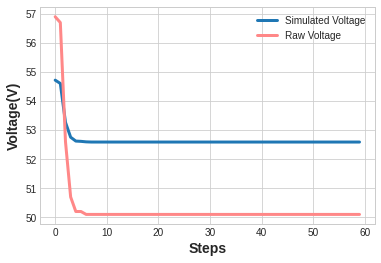

In [32]:
# Example usage
env = BatteryEnv()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
filename= 'v_cc_100.png'  

agent= DQNAgent(gamma= 0.99, epsilon= 1.0, lr= 0.001, input_dims= [12],
                                                         n_actions= 3, mem_size= 500000, eps_min=0.1, 
                                                         batch_size=64 , replace =1000, eps_dec=1e-5, chkpt_dir='models/', algo= 'dqn_3_D_r3_more', 
                                                         env_name='BatteryEnv')
#agent.load_models()
test_agent_with_custom_render(agent, env)

In [29]:
def test_agent_with_custom_render2(agent, env):
  
    simulated_data=[]
    raw_data=[]

    #test our model 

    episodes = 1
    for episode in range(1, episodes+1):
        done = False
        obs = env.reset()
        score=0

        while not done:
            env.render()
            obs = np.reshape(obs, [1, 11])
            action =  agent.predict(obs)
            obs, reward, done, info = env.step(action)
            score+=reward
            
           # transition_state= next(iter(info))
            #simulated_data.append(transition_state[5])
            #raw_data.append(transition_state[2])
            
           # simulated_data.append(obs[6])
           # raw_data.append(obs[3])

           # Fscore = np.sqrt(metrics.mean_squared_error(raw_data,simulated_data))
           # MAPE= mean_absolute_percentage_error(raw_data, simulated_data)
           # R_Squared= r2_score(raw_data, simulated_data, multioutput='variance_weighted')
            

        
        print('Episode:{} Score:{} State : {} Action: {} info: {}'.format(episode, score,obs,  action, info))
        
    #df_test= pd.DataFrame(list(zip(episode, score, Action, Parameters, RMSE, MAPE, R_squared)), columns=['Episode ', 'Scores', 'Action', 'Parameters', 'RMSE', 'MAPE', 'R_Squared'])
    #df_test.to_csv('three_actions_1.pth.csv', index=False)
    
    


 

In [30]:
# Example usage
env = BatteryEnv()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent= DQNAgent(gamma= 0.99, epsilon= 1.0, lr= 0.0001, input_dims= [11],
                                                         n_actions= 3, mem_size= 500000, eps_min=0.1, 
                                                         batch_size=64 , replace =1000, eps_dec=1e-5, chkpt_dir='models/', algo= 'DQNAgent', 
                                                         env_name='BatteryEnv')
#agent.load_models()
test_agent_with_custom_render2(agent, env)

ValueError: cannot reshape array of size 12 into shape (1,11)